In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_excel("nikotin_all.xlsx")
data.head()

,id,name,brand,flavor,nicotine,pack_size,price,e-shop,stock,url,date
0,dope-mata-16,DOPE FREEZE STRONG EDITION,DOPE,máta,16.0,NaN,129,nicopods.cz,1.0,https://www.nicopods.cz/dope/dope-freeze-stron...,2025-05-05
1,velo-hroznove-vino-15,VELO PURPLE GRAPE,VELO,hroznové víno,15.0,NaN,150,nicopods.cz,1.0,https://www.nicopods.cz/lyft-velo/velo-royal-p...,2025-05-05
2,ace-mata-16,ACE EUCALYPTUS,ACE,máta,16.0,NaN,149,nicopods.cz,1.0,https://www.nicopods.cz/ace/ace-eucalyptus/,2025-05-05
3,goat-boruvka-12,GOAT BLUEBERRY LIGHT #12,GOAT,borůvka,12.0,NaN,139,nicopods.cz,1.0,https://www.nicopods.cz/goat/goat-blueberry-li...,2025-05-05
4,goat-tropicke-ovoce-12,GOAT TROPICAL LIGHT #12,GOAT,tropické ovoce,12.0,NaN,139,nicopods.cz,1.0,https://www.nicopods.cz/goat/goat-tropical-lig...,2025-05-05


In [43]:
data["price"].unique()

array([129, 150, 149, 139, 169, 110, 119, 120, 104, 140, 125, 105, 115,
       99, 109, 135, 95, 90, 159, 124, 144, 136, 134, 118, 470, 420, 390,
       270, 240, 220, 2999, '270 Kč', '150 Kč', '129 Kč', 113, 130, 0],
      dtype=object)

In [45]:
# Předpoklad: sloupec obsahuje kombinaci čísel a řetězců
data["price"] = (
    data["price"]
    .astype(str)  # převede čísla na řetězce
    .str.replace(" Kč", "", regex=False)  # odstraní jednotku
    .replace("nan", pd.NA)  # převede textový 'nan' na pandas NA
    .astype("Int64")  # bezpečný integer typ podporující NA
)

In [55]:
data["brand"].unique()

array(['DOPE', 'VELO', 'ACE', 'GOAT', 'KURWA COLLECTION', 'DARK EDITION',
       'SPEACIAL EDITION', 'SYX', 'ZYN', 'LIGHT EDITION', 'KILLA',
       'GRITT', 'WHITE FOX', 'PABLO',
       'Jednorázové e-cigarety a nikotinové sáčky v akci',
       'DOPE - Nikotinové sáčky', 'Nikotinové sáčky',
       'WHITE FOX - Nikotinové sáčky', 'KILLA - Nikotinové sáčky',
       '77 - Nikotinové sáčky', 'BAGZ - Nikotinové sáčky',
       'GOAT - Nikotinové sáčky', 'KURWA - Nikotinové sáčky',
       'PABLO - Nikotinové sáčky', 'VELO - Nikotinové sáčky',
       'ZEUS - Nikotinové sáčky', 'ZYN - Nikotinové sáčky',
       'SNATCH - Nikotinové sáčky', 'CUBA', 'BARON', '77', 'FEDRS', 'FIX',
       'SIBERIA', 'ICEBERG', 'SNATCH', 'EMPIRE OF SNUS - EOS', 'KURWA',
       'KURWA FATALITY', 'KURWA KILLER', 'PAZ', 'NOTO', 'NOIS', 'LYFT',
       'XTRIME', 'XQS', 'LOOP', 'LIPS', 'KLINT', 'STRIPE', 'GRANT',
       'CANDYS', 'Zyn', 'Siberia', 'White Fox', 'AROMA KING', 'Dope',
       'ON!', 'Snatch', 'Kurwa', 'Bagz', 

In [57]:
brand_mapper = {
    "dope": "DOPE",
    "dope - nikotinové sáčky": "DOPE",
    "velo": "VELO",
    "velo - nikotinové sáčky": "VELO",
    "ace": "ACE",
    "goat": "GOAT",
    "goat - nikotinové sáčky": "GOAT",
    "kurwa": "KURWA",
    "kurwa - nikotinové sáčky": "KURWA",
    "kurwa killer": "KURWA",
    "kurwa fatality": "KURWA",
    "kurwa collection": "KURWA",
    "dark edition": "KURWA",
    "speacial edition": "KURWA",
    "light edition": "KURWA",
    "syx": "SYX",
    "zyn": "ZYN",
    "white fox": "WHITE FOX",
    "white fox - nikotinové sáčky": "WHITE FOX",
    "killa": "KILLA",
    "killa - nikotinové sáčky": "KILLA",
    "gritt": "GRITT",
    "pablo": "PABLO",
    "pablo - nikotinové sáčky": "PABLO",
    "77": "77",
    "77 - nikotinové sáčky": "77",
    "bagz": "BAGZ",
    "bagz - nikotinové sáčky": "BAGZ",
    "zeus - nikotinové sáčky": "ZEUS",
    "snatch": "SNATCH",
    "snatch - nikotinové sáčky": "SNATCH",
    "cuba": "CUBA",
    "baron": "BARON",
    "fedrs": "FEDRS",
    "fix": "FIX",
    "siberia": "SIBERIA",
    "iceberg": "ICEBERG",
    "empire of snus - eos": "EOS",
    "paz": "PAZ",
    "noto": "NOTO",
    "nois": "NOIS",
    "lyft": "LYFT",
    "xqs": "XQS",
    "loop": "LOOP",
    "xtrime": "XTRIME",
    "lips": "LIPS",
    "klint": "KLINT",
    "stripe": "STRIPE",
    "grant": "GRANT",
    "candys": "CANDYS",
    "on!": "ON!",
    "aroma king": "AROMA KING",
    "aroma king ": "AROMA KING",
    "unknown": "UNKNOWN",
    "nikotinové sáčky": None,
    "jednorázové e-cigarety a nikotinové sáčky v akci": None,
    float("nan"): None
}


In [59]:
# Předzpracování a mapování značek
data["brand_clean"] = (
    data["brand"]
    .astype(str)
    .str.lower()
    .str.strip()
    .map(brand_mapper)
)

In [121]:
data["brand_clean"].unique()
data = data[data["brand_clean"] != "UNKNOWN"]

In [171]:
group_brand_price = data.groupby("brand_clean")["price"].mean().reset_index().sort_values(by = "price", ascending = True).head(28)
group_brand_price = group_brand_price.sort_values(by = "price", ascending = False)
group_brand_price

,brand_clean,price
29,SYX,129.5
23,ON!,129.0
34,ZEUS,129.0
1,ACE,128.056604
11,GOAT,126.987616
32,XQS,125.0
17,KURWA,124.666667
6,CUBA,123.885993
0,77,122.350785
24,PABLO,121.082803


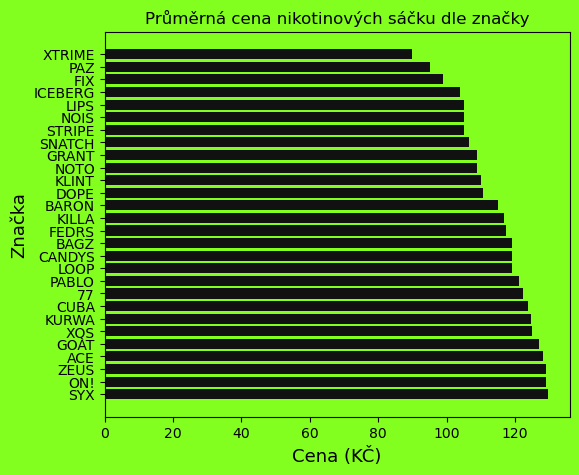

In [175]:
plt.figure(figsize = (6,5), facecolor="#82FF1F")
plt.gca().set_facecolor('#82FF1F')  
plt.barh(group_brand_price["brand_clean"], group_brand_price["price"], color = "#111111")
plt.xlabel("Cena (KČ)", fontsize = 13)
plt.ylabel("Značka", fontsize = 13)
plt.title("Průměrná cena nikotinových sáčku dle značky")
plt.savefig("graf.png", dpi=300, facecolor='#82FF1F')
plt.show()